In [7]:
from autoencoder.model import VAE
from autoencoder.model import Sampling
from PIL import Image

import numpy as np

Network = VAE("./trained_models/vae_encoder_epoch_24.h5", "./trained_models/vae_decoder_epoch_24.h5")

In [4]:
import h5py
global labels, images

with h5py.File('Galaxy10.h5', 'r') as F:    

    labels = np.array(F['ans'])
    (milkywaylikes_idx,) = np.where(labels > 3)
    images = np.array(F['images'][milkywaylikes_idx])
    labels = np.array(F['ans'][milkywaylikes_idx]) - 4
    images = images.astype(np.float32) / 255.

_, y, x, _ = images.shape
startx = x // 2 -(64 // 2)
starty = y // 2 -(64 // 2)    

images = images[:, starty:starty + 64, startx:startx + 64, :]

In [5]:
def calculate_distance(features_1, features_2):
    return np.linalg.norm(np.array(features_1) - np.array(features_2))

In [8]:
# def get_closest_neighbour(NN, reference_image):

reference_image = "./images/cropped/example_07.png"

if isinstance(reference_image, str):
    reference_image = np.array(Image.open(reference_image))
    reference_latent_position = Network.encode(np.array([reference_image]).reshape(1,64,64,3))

elif isinstance(reference_image, np.ndarray):
    reference_latent_position = Network.encode(np.array([reference_image]).reshape(1,64,64,3))

    # try:
    #     images == None
    # except NameError:
    #     load_training_dataset()

predictions = np.array(Network.encoder.predict(images))

147/147 [==============================] - 10s 66ms/step


In [19]:
print(predictions[0, :, :].shape)
print(labels.shape)

(4686, 8)
(4686,)


In [18]:
for i, prediction in enumerate(predictions[0, :, :]):

    print(len(prediction))
    print(len(reference_latent_position[0][0]))

    current_distance = calculate_distance(prediction, reference_latent_position)

        # if current_distance < min_distance:

        #     min_distance = current_distance
        #     min_index = i


    break

8
8


In [25]:
import matplotlib.pyplot as plt

classwise_distances = [[] for _ in range(len(np.unique(labels)))]

for label, prediction in zip(labels, predictions[0, :, :]):
    
    classwise_distances[label].append(calculate_distance(prediction, reference_latent_position))

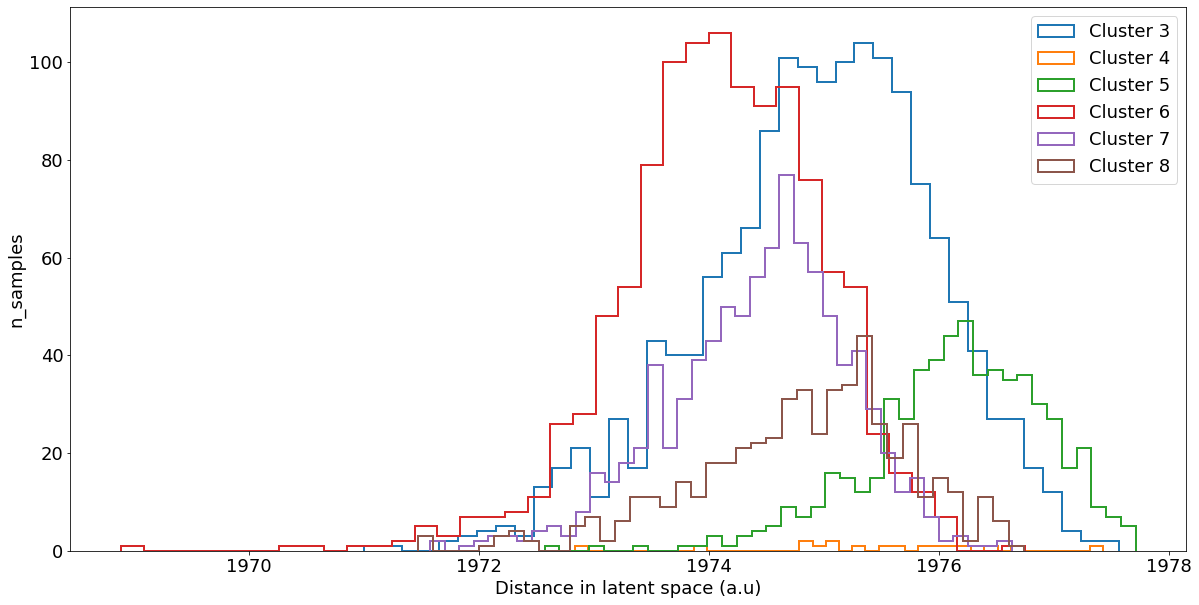

In [52]:
for i, _class in enumerate(classwise_distances):

    plt.hist(_class, histtype = "step", lw = 2, label = f"Cluster {i + 3}", bins = 40)

# plt.arrow(x = 1325.64855, y = 30, dx = 0, dy = -25)
plt.ylabel("n_samples")
plt.xlabel("Distance in latent space (a.u)")
plt.legend()

plt.savefig("classwise_distances.png")


In [36]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["font.size"] = 18